# Education

For my metric, I looked at the number of students enrolled in k-12 schools throughout Pittsburgh. My metric for deciding the 'best' neighborhood was the neighborhood with the highest number of people enrolled in grade school as it is an important factor in a successful neighborhood. To me, high enrollment means diversity in age, sense of community in that neighborhood, and diversity in schools in Pittsburgh. A lot of the schools host people from all different neighborhoods.
I found that there is high variability in the amount of students enrolled by neighborhood as we will see later.

# Raw Data

Here is a data frame of the raw data I was presented. For today, I'll only be focusing on the neighborhoods, and the number of enrolled students, not the schools. 

In [1]:
# importing pandas
import pandas as pd

education = pd.read_csv("schooldata.csv")
education.head(20)


,neighborhood,school,enrolled_students
0,Allegheny Center,Other,50
1,Allegheny Center,PITTSBURGH KING PreK-8,34
2,Allentown,Other,96
3,Allentown,PITTSBURGH GRANDVIEW PreK-5,76
4,Allentown,PITTSBURGH SOUTH HILLS 6-8,50
5,Allentown,PITTSBURGH CARRICK HIGH SCHOOL,35
6,Allentown,PITTSBURGH CARMALT PreK-8,21
7,Allentown,PITTSBURGH OBAMA IB 6-12,11
8,Arlington,PITTSBURGH ARLINGTON PreK-8,61
9,Arlington,Other,56


# Number of Students Enrolled in School from Each Neighborhood

I consolidated my data to show the neighborhoods and their enrolled students, sorted in ascending order with the neighborhoods with highest enrollment at the top, and lowest at the bottom. As you can see, Carrick and Brookline have marginally higher enrollment than most of the other neighborhoods. Central Oakland and North Oakland have the lowest enrollment in k-12 schools, which makes sense considering they mostly contain Pitt's campus and college-level student housing.

In [2]:
#consolidating my data set, making sure the neighborhoods only show up once. Also sorting them by neighborhood with largest enrollment.
neighborhoods = education.groupby('neighborhood')['enrolled_students'].sum()
neighborhoods = pd.DataFrame(neighborhoods)
neighborhoodsSort = neighborhoods.sort_values(by = ["enrolled_students"], ascending = False)
neighborhoodsSort = pd.DataFrame(neighborhoodsSort)
neighborhoodsSort



,enrolled_students
neighborhood,
Carrick,1276
Brookline,1169
Beechview,794
Sheraden,694
Squirrel Hill South,679
...,...
Saint Clair,25
Ridgemont,20
Golden Triangle,18


# Total Number of Students Enrolled in Pittsburgh Public Schools

In [3]:
# Calculating the total of all of the enrolled students
totalEnrollment = neighborhoods.sum()
totalEnrollment = pd.DataFrame(totalEnrollment)
totalEnrollment


,0
enrolled_students,22352


# Neighborhoods with the Highest Enrollment

I organized the top 10 neighborhoods with highest enrollment into a bar graph to present a visual on the make up of Pittsburgh Public School students. The neighborhood with the 10th highest enrollment, East Hills, has less than half of the top neighborhood, Carrick.

Text(0, 0.5, 'Neighborhood')

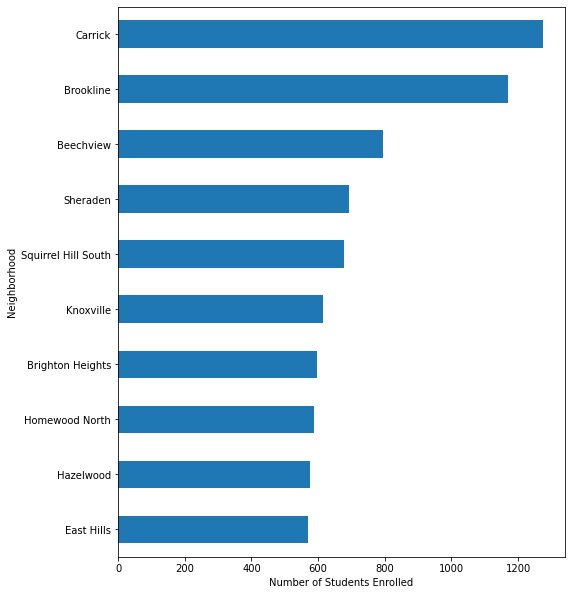

In [4]:
# turning my data into a bar graph
neighborhoodsSort = neighborhoods.sort_values(by = ["enrolled_students"], ascending = True)
graph = neighborhoodsSort[77:].plot.barh(figsize=(8,education.shape[0] * 0.02), legend=None)
graph.set_xlabel("Number of Students Enrolled")
graph.set_ylabel("Neighborhood")
                          

# Percent of Enrolled Students from Each Neighborhood

Below is a data frame of the percentage of the total enrolled students from each neighborhood. Carrick makes up almost 6% of the total number of students in Pittsburgh with North Oakland making up less than .05%

In [5]:
# calculating the percentages
def percentEnrolled(x):
    p = (x/22352)*100
    return p
# sorting the data into a dataframe
percent = neighborhoods['enrolled_students'].apply(percentEnrolled)
percent = pd.DataFrame(percent)
percentSort = percent.sort_values(by = ['enrolled_students'], ascending = False)

pData = pd.DataFrame(percentSort)
pData


,enrolled_students
neighborhood,
Carrick,5.708661
Brookline,5.229957
Beechview,3.552255
Sheraden,3.104868
Squirrel Hill South,3.037759
...,...
Saint Clair,0.111847
Ridgemont,0.089477
Golden Triangle,0.080530


# Top 5 neighborhoods and Their Population
Here I decided to find the populations of the 5 neighborhoods with the most enrolled students.

In [6]:
# initialize list of lists
popData = [['Carrick', 7923], ['Brookline', 13725], ['Beechview', 22449], ['Sheraden', 8124], ['Squirrel Hill South', 15171]]
 
# Create the dataframe
population = pd.DataFrame(popData, columns=['Neighborhood', 'Population'])
population

,Neighborhood,Population
0,Carrick,7923
1,Brookline,13725
2,Beechview,22449
3,Sheraden,8124
4,Squirrel Hill South,15171


# Percent of Total Population
Carrick with the highest enrollment in Pittsburgh, also has the highest percentage of their population enrolled in school, compared to the other 4 nieghborhoods with the highest enrollment. Even though Sheredan was 4th highest in enrollment, they have the 2nd highest percent of their population enrolled in school. Although this information is interesting, I chose not to use it to rank my neighborhoods because I would need to manually find the population of ever single neighborhood.

In [7]:
# find percentage values for each neighborhood
Carrick = (1276/7923)*100
Brookline = (1169/13725)*100
Beechview = (794/22449)*100
Sheraden = (694/8124)*100
SquirrelHillSouth = (679/15171)*100

popPercent = [['Carrick', Carrick], ['Brookline', Brookline], ['Beechview', Beechview], ['Sheraden', Sheraden], ['Squirrel Hill South', SquirrelHillSouth]]
 
# Create the dataframe
pdf = pd.DataFrame(popPercent, columns=['Neighborhood', 'Percentage'])
pdf





,Neighborhood,Percentage
0,Carrick,16.105011
1,Brookline,8.517304
2,Beechview,3.536906
3,Sheraden,8.542590
4,Squirrel Hill South,4.475644


# What's the Best Neighborhood?

Based on my data set, and my metric, I would conclude that Carrick is the best neighborhood in Pittsburgh. It has a high population of students enrolled in school, especially compared to many of the other neighbhorhoods.
